In [13]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
import hvplot.pandas
from sklearn.cluster import KMeans
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load data

data_df = pd.read_csv("converted.csv",index_col="Unnamed: 0")
data_df.head()

,city_development_index,training_hours,target,gender_num,relevent_experience_num,enrolled_university_num,education_level_num,major_discipline_num,experience_num,company_size_num,company_type_num,last_new_job_num
1,0.776,47,0.0,0,0,0,0,0,15,2,0,5
4,0.767,8,0.0,0,1,0,1,0,21,2,1,4
7,0.762,18,1.0,0,1,0,0,0,13,0,0,5
8,0.920,46,1.0,0,1,0,0,0,7,2,0,1
11,0.920,108,0.0,0,1,0,0,0,5,6,0,1


In [3]:
df0=data_df[data_df["target"]==0]
df0

,city_development_index,training_hours,target,gender_num,relevent_experience_num,enrolled_university_num,education_level_num,major_discipline_num,experience_num,company_size_num,company_type_num,last_new_job_num
1,0.776,47,0.0,0,0,0,0,0,15,2,0,5
4,0.767,8,0.0,0,1,0,1,0,21,2,1,4
11,0.920,108,0.0,0,1,0,0,0,5,6,0,1
12,0.913,23,0.0,0,1,0,0,0,21,5,0,3
15,0.926,18,0.0,0,1,0,0,0,16,1,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...
19143,0.920,18,0.0,0,1,0,0,0,21,7,0,5
19146,0.920,51,0.0,0,1,0,0,0,5,4,0,1
19150,0.920,23,0.0,1,1,0,0,0,10,3,3,3
19152,0.920,25,0.0,1,1,0,0,1,7,1,1,1


In [4]:
df1=data_df[data_df["target"]==1]
df1

,city_development_index,training_hours,target,gender_num,relevent_experience_num,enrolled_university_num,education_level_num,major_discipline_num,experience_num,company_size_num,company_type_num,last_new_job_num
7,0.762,18,1.0,0,1,0,0,0,13,0,0,5
8,0.920,46,1.0,0,1,0,0,0,7,2,0,1
29,0.624,68,1.0,0,1,0,0,0,18,2,1,2
37,0.926,42,1.0,0,1,0,2,0,21,3,0,4
44,0.624,7,1.0,0,1,1,1,0,9,6,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...
19086,0.624,184,1.0,0,0,0,0,0,10,6,0,1
19122,0.910,78,1.0,0,1,0,0,0,8,0,0,3
19127,0.847,10,1.0,0,1,0,0,0,8,7,3,1
19147,0.624,52,1.0,0,0,2,0,0,1,3,0,1


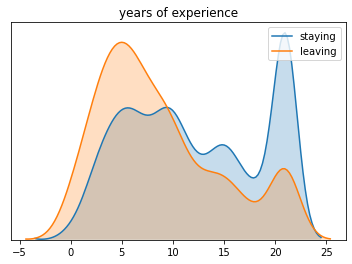

In [28]:
plt.title("years of experience")
sns.kdeplot(df0["experience_num"],label='staying',shade = True)
sns.kdeplot(df1["experience_num"],label='leaving',shade = True)
plt.legend(loc='upper right')
plt.yticks([])
plt.show()

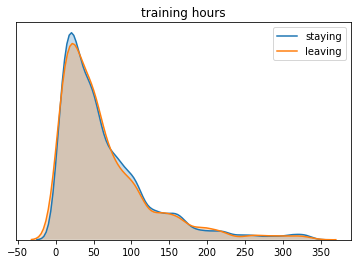

In [32]:
plt.title("training hours")
sns.kdeplot(df0["training_hours"],label='staying',shade = True)
sns.kdeplot(df1["training_hours"],label='leaving',shade = True)
plt.legend(loc='upper right')
plt.yticks([])
plt.show()

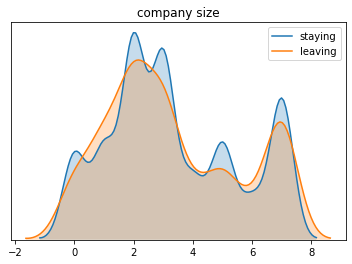

In [34]:
plt.title("company size")
sns.kdeplot(df0["company_size_num"],label='staying',shade = True)
sns.kdeplot(df1["company_size_num"],label='leaving',shade = True)
plt.legend(loc='upper right')
plt.yticks([])
plt.show()

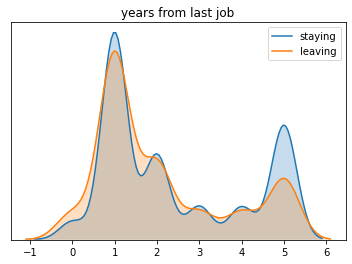

In [37]:
plt.title("years from last job")
sns.kdeplot(df0["last_new_job_num"],label='staying',shade = True)
sns.kdeplot(df1["last_new_job_num"],label='leaving',shade = True)
plt.legend(loc='upper right')
plt.yticks([])
plt.show()

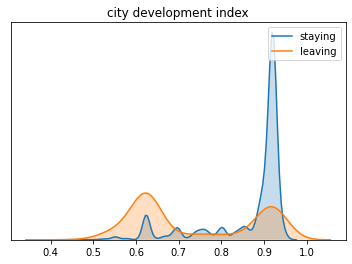

In [38]:
plt.title("city development index")
sns.kdeplot(df0["city_development_index"],label='staying',shade = True)
sns.kdeplot(df1["city_development_index"],label='leaving',shade = True)
plt.legend(loc='upper right')
plt.yticks([])
plt.show()

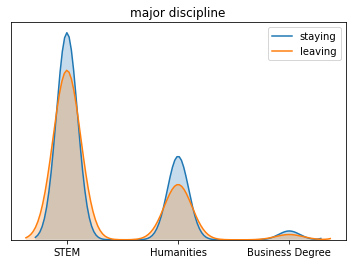

In [46]:
plt.title("major discipline")
sns.kdeplot(df0["education_level_num"],label='staying',shade = True)
sns.kdeplot(df1["education_level_num"],label='leaving',shade = True)
plt.legend(loc='upper right')
plt.yticks([])
plt.xticks([0, 1, 2],['STEM', 'Humanities', 'Business Degree'])
plt.show()